In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict
import os


# interpolation

In [2]:
files = {
    'fasttext': 'log/WRD_COS_interpolation_fasttext.csv',
    'fasttext_sw': 'log/WRD_COS_interpolation_fasttext_sw.csv',
    'glove42b': 'log/WRD_COS_interpolation_glove42b.csv',
    'glove840b':'log/WRD_COS_interpolation_glove840b.csv',
    'paragram': 'log/WRD_COS_interpolation_paragram.csv',
    'paranmt': 'log/WRD_COS_interpolation_paranmt.csv',
    'psl': 'log/WRD_COS_interpolation_psl.csv'
}
files = {
    'SUP+PSL': 'log/Interpolation_SUP_psl.csv'
}

In [3]:
def plot_interp(ax, pre, vectors):
    f = 'log/Interpolation_dev_{}_{}.csv'.format(pre, vectors)
    df = pd.read_csv(f)
    c_arr = df['coef_C'].unique()
    p_arr = df['coef_P'].unique()
    interp_matrix = np.zeros((len(c_arr), len(p_arr)))
    print(c_arr, p_arr)
    for i, (c, p, l, m, r) in df.iterrows():
        ic = i // len(p_arr)
        ip = i % len(p_arr)
        interp_matrix[ic, ip] = m
    interp_matrix *= 100
    im = ax.contourf(interp_matrix[:, :11], cmap='cool')
    if vectors == 'paranmt':
#         ax.set_xticks(np.arange(11))
#         ax.set_xticklabels(["{:.2f}".format(v) for v in p_arr[:11].tolist()], rotation=45)
        ax.set_xticks([0, 3, 6, 10])
        ax.set_xticklabels(["0", "0.6", "10", "400"], rotation=45)
        ax.set_xlabel(r"$\epsilon$", fontsize=12)
    else:
        ax.set_xticks([])
    if pre == 'SUP':
        ax.set_yticks([0, 5, 10])
        ax.set_yticklabels(["0", "0.5", "1"])
        ax.set_ylabel(r"$\alpha$".format(vectors), fontsize=12)
    else:
        ax.set_yticks([])
        
    ind = np.unravel_index(np.argmax(interp_matrix, axis=None), interp_matrix.shape)
    ax.scatter(ind[1], ind[0], c='black')
    interp = interp_matrix[ind]
    wrd = interp_matrix[0][0]
    cos = interp_matrix[-1][-1]
    ax.set_title("({:.2f}, {:.2f}, {:.2f})".format(wrd, interp, cos), fontsize=10)
    return im


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.00000000e+00 1.00000000e-01 2.51188643e-01 6.30957344e-01
 1.58489319e+00 3.98107171e+00 1.00000000e+01 2.51188643e+01
 6.30957344e+01 1.58489319e+02 3.98107171e+02]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.00000000e+00 1.00000000e-01 2.51188643e-01 6.30957344e-01
 1.58489319e+00 3.98107171e+00 1.00000000e+01 2.51188643e+01
 6.30957344e+01 1.58489319e+02 3.98107171e+02]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.00000000e+00 1.00000000e-01 2.51188643e-01 6.30957344e-01
 1.58489319e+00 3.98107171e+00 1.00000000e+01 2.51188643e+01
 6.30957344e+01 1.58489319e+02 3.98107171e+02]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.00000000e+00 1.00000000e-01 2.51188643e-01 6.30957344e-01
 1.58489319e+00 3.98107171e+00 1.00000000e+01 2.51188643e+01
 6.30957344e+01 1.58489319e+02 3.98107171e+02]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.00000000e+00 1.00000000e-01 2.51188643e-01 6.30957344e-01
 1.58489319e+00 3.98107171e+00 1.

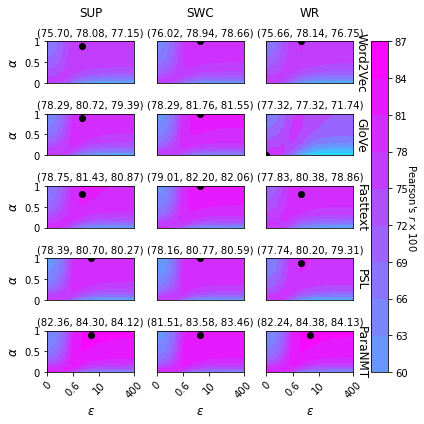

In [4]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(6, 6))
images = []
for i, vectors in enumerate(['word2vec', 'glove840b', 'fasttext', 'psl', 'paranmt']):
    for j, pre in enumerate(['SUP', 'SWC', 'WR']):
        f = 'log/Interpolation_{}_{}.csv'.format(pre, vectors)
        if os.path.exists(f):
            im = plot_interp(ax[i][j], pre, vectors)
            images.append(im)

from matplotlib import colors
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect('changed', update)
    
pad = 5
for a, col in zip(ax[0], ['SUP', 'SWC', 'WR']):
    a.annotate(col, xy=(0.5, 1), xytext=(0, 5* pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for a, row in zip(ax[:,-1], ['Word2Vec', 'GloVe', 'Fasttext', 'PSL', 'ParaNMT']):
    a.annotate(row, xy=(0, 0.5), xytext=(105, 0),
                xycoords=a.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=-90)
    
fig.tight_layout()
cb = fig.colorbar(images[-1], ax=ax, orientation='vertical', fraction=.1)
cb.set_label(r"Pearson's $r\times 100$", rotation=270, labelpad=10)
fig.savefig('/Users/zihao/Nutstore Files/我的坚果云/Research/Sentence Similarity + Prior OT/acl-ijcnlp2021-templates/interp_dev.pdf')

In [5]:
def get_subtable(df, word_vector, merge_STS=False):
    sdf = df[df['word vector'] == word_vector]
    data = defaultdict(list)

    datasets = datasets_core
    models = sdf['model'].unique()
    
    for ds in datasets:
        for m in models:
            _sdf = sdf[sdf['dataset'] == ds]
            _sdf = _sdf[_sdf['model'] == m]
            score_sr = _sdf['score']
            if len(score_sr):
                score = float(score_sr.tolist()[0])
                data[ds].append(score)
                
    if merge_STS:
        sts_list = ["sts:" + str(y) for y in range(2012, 2017)]
        for sts in sts_list:
            score_arr = np.asarray([data[ds] for ds in datasets if sts in ds])
            score = np.mean(score_arr, axis=0).tolist()
            data[sts] = score
        
    nds = pd.DataFrame(data, index=models)
    return nds, data

    

# Major Comparison

In [6]:
from model.word_vector import VectorNames
datasets_short_list = [
    'stsb:test',
#     'stsb:dev',
#     'twitter:test',
    'sick:r', 
    'sts:2012',
    'sts:2013',
    'sts:2014',
    'sts:2015',
    'sts:2016',
]
datasets_full_list = [
    'stsb:test',
    'twitter:test',
    'sick:r', 
    'sts:2012',
    'sts:2013',
    'sts:2014',
    'sts:2015',
    'sts:2016',
]
datasets_core = [
    'stsb:test',
#     'stsb:dev',
    'twitter:test',
    'sick:r',
]

In [67]:
def show_rots(which_rots=None, sort=False, save=True, prefix="", datasets=[]):
    baselinefiles = {
        'COS+SUP': "log/major_compare_COS+SUP/major_comparison.csv",
        'WRD+SUP': 'log/major_compare_WRD+SUP/major_comparison.csv',        
        'WRD+SUP+levels': 'log/major_compare_WRD+SUP+levels/major_comparison.csv',
        'ROTS+SUP': "log/major_compare_ROTS+SUP/major_comparison.csv",
#         'ROTS+SUP_spearmanr': "log/major_compare_spearmanr_ROTS+SUP/major_comparison.csv",
   
        'COS+SWC': "log/major_compare_COS+SWC/major_comparison.csv",
        'WRD+SWC': 'log/major_compare_WRD+SWC/major_comparison.csv',
        'WRD+SWC+levels': 'log/major_compare_WRD+SWC+levels/major_comparison.csv',
        'ROTS+SWC': "log/major_compare_ROTS+SWC/major_comparison.csv",
#         'ROTS+SWC_spearmanr': "log/major_compare_spearmanr_ROTS+SWC/major_comparison.csv",
        
        'COS+WR': "log/major_compare_COS+WR/major_comparison.csv",
        'WRD+WR': 'log/major_compare_WRD+WR/major_comparison.csv',
        'WRD+WR+levels': 'log/major_compare_WRD+WR+levels/major_comparison.csv',
        'ROTS+WR': "log/major_compare_ROTS+WR/major_comparison.csv",
#         'ROTS+WR_spearmanr': "log/major_compare_spearmanr_ROTS+WR/major_comparison.csv"
    }
    df = pd.DataFrame()
    for k, path in baselinefiles.items():
        _df = pd.read_csv(path)
        df = df.append(_df)


    for wv in VectorNames:
        nds, _ = get_subtable(df, wv)
        print("="*10)
        print(wv)
        if len(datasets):
            show = nds[datasets]
        else:
            show = nds
#         show = nds
        show['mean'] = show.agg('mean', axis='columns')
#         s = 0
#         for stsyear in ['sts:2012', 'sts:2013', 'sts:2014', 'sts:2015', 'sts:2016']:
#             s += show[stsyear]
#         show['mean 12-16'] = s / 5
        if sort:
            show = show.sort_values('mean', ascending=False)
        show = show.applymap(lambda f: "{:.2f}".format(f*100))
        print(show.to_latex())
        if save:
            show.to_csv('out/{}-{}.csv'.format(prefix, wv), index_label='similarity')

        
def get_subtable(df, word_vector, merge_STS=True):
    sdf = df[df['word vector'] == word_vector]
    data = defaultdict(list)

    datasets = sdf['dataset'].unique()
    models = sdf['model'].unique()
#     models = []
#     for m in _models:
#         if m.split('+')[0] == 'ROTS' and not m.endswith('4'):
#             continue
#         models.append(m)
    
    for ds in datasets:
        for m in models:
            _sdf = sdf[sdf['dataset'] == ds]
            _sdf = _sdf[_sdf['model'] == m]
            score_sr = _sdf['score']
            if len(score_sr):
                score = float(score_sr.tolist()[0])
                data[ds].append(score)
                
    if merge_STS:
        sts_list = ["sts:" + str(y) for y in range(2012, 2017)]
        for sts in sts_list:
            score_arr = np.asarray([data[ds] for ds in datasets if sts in ds])
            score = np.mean(score_arr, axis=0).tolist()
            data[sts] = score
    model_names = []
    for m in models:
        if 'levels' in m:
            m = m.replace('levels', 'L')
        model_names.append(m)
    nds = pd.DataFrame(data, index=model_names)
    return nds, data

In [68]:
kvs = [
    ('ablation-depth', ['stsb:test']),
    ('benchmark', datasets_short_list),
    ('ablation-core', datasets_core),
    ('full-list', datasets_full_list)
]
for prefix, datasets in kvs:
    show_rots(sort=False, save=True, prefix=prefix, datasets=datasets)

psl
\begin{tabular}{lll}
\toprule
{} & stsb:test &   mean \\
\midrule
COS+SUP      &     73.50 &  73.50 \\
WRD+SUP      &     73.78 &  73.78 \\
WRD+SUP+L0   &     73.50 &  73.50 \\
WRD+SUP+L1   &     67.51 &  67.51 \\
WRD+SUP+L2   &     68.96 &  68.96 \\
WRD+SUP+L3   &     70.92 &  70.92 \\
WRD+SUP+L4   &     72.25 &  72.25 \\
ROTS+SUP0    &     73.50 &  73.50 \\
ROTS+SUP1    &     73.76 &  73.76 \\
ROTS+SUP2    &     73.95 &  73.95 \\
ROTS+SUP3    &     73.95 &  73.95 \\
ROTS+SUP4    &     74.48 &  74.48 \\
ROTS+SUPmean &     74.19 &  74.19 \\
ROTS+SUPmax  &     74.42 &  74.42 \\
ROTS+SUPmin  &     73.52 &  73.52 \\
ROTS+SUPlast &     74.24 &  74.24 \\
COS+SWC      &     74.22 &  74.22 \\
WRD+SWC      &     73.01 &  73.01 \\
WRD+SWC+L0   &     73.93 &  73.93 \\
WRD+SWC+L1   &     66.32 &  66.32 \\
WRD+SWC+L2   &     67.76 &  67.76 \\
WRD+SWC+L3   &     69.95 &  69.95 \\
WRD+SWC+L4   &     71.31 &  71.31 \\
ROTS+SWC0    &     73.93 &  73.93 \\
ROTS+SWC1    &     74.06 &  74.06 \\
ROTS+

<ipython-input-67-fb0cc3cde923>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


paranmt
\begin{tabular}{lll}
\toprule
{} & stsb:test &   mean \\
\midrule
COS+SUP      &     79.55 &  79.55 \\
WRD+SUP      &     79.05 &  79.05 \\
WRD+SUP+L0   &     79.55 &  79.55 \\
WRD+SUP+L1   &     74.50 &  74.50 \\
WRD+SUP+L2   &     75.42 &  75.42 \\
WRD+SUP+L3   &     76.33 &  76.33 \\
WRD+SUP+L4   &     77.61 &  77.61 \\
ROTS+SUP0    &     79.55 &  79.55 \\
ROTS+SUP1    &     79.73 &  79.73 \\
ROTS+SUP2    &     79.73 &  79.73 \\
ROTS+SUP3    &     79.54 &  79.54 \\
ROTS+SUP4    &     79.74 &  79.74 \\
ROTS+SUPmean &     79.81 &  79.81 \\
ROTS+SUPmax  &     79.74 &  79.74 \\
ROTS+SUPmin  &     79.29 &  79.29 \\
ROTS+SUPlast &     79.37 &  79.37 \\
COS+SWC      &     79.70 &  79.70 \\
WRD+SWC      &     77.98 &  77.98 \\
WRD+SWC+L0   &     79.71 &  79.71 \\
WRD+SWC+L1   &     72.47 &  72.47 \\
WRD+SWC+L2   &     73.87 &  73.87 \\
WRD+SWC+L3   &     75.08 &  75.08 \\
WRD+SWC+L4   &     76.34 &  76.34 \\
ROTS+SWC0    &     79.71 &  79.71 \\
ROTS+SWC1    &     79.78 &  79.78 \\
R

paranmt
\begin{tabular}{lllllllll}
\toprule
{} & stsb:test & sick:r & sts:2012 & sts:2013 & sts:2014 & sts:2015 & sts:2016 &   mean \\
\midrule
COS+SUP      &     79.55 &  73.89 &    67.81 &    64.49 &    78.02 &    78.99 &    76.89 &  74.24 \\
WRD+SUP      &     79.05 &  70.02 &    67.66 &    61.63 &    75.44 &    80.02 &    76.17 &  72.86 \\
WRD+SUP+L0   &     79.55 &  73.89 &    67.81 &    64.48 &    78.02 &    78.99 &    76.89 &  74.23 \\
WRD+SUP+L1   &     74.50 &  73.21 &    61.60 &    58.71 &    69.59 &    75.93 &    72.18 &  69.39 \\
WRD+SUP+L2   &     75.42 &  72.56 &    63.15 &    59.00 &    70.41 &    77.46 &    71.10 &  69.87 \\
WRD+SUP+L3   &     76.33 &  71.07 &    64.23 &    61.26 &    72.38 &    78.48 &    71.98 &  70.82 \\
WRD+SUP+L4   &     77.61 &  70.42 &    65.38 &    61.32 &    74.10 &    79.44 &    74.53 &  71.83 \\
ROTS+SUP0    &     79.55 &  73.89 &    67.81 &    64.48 &    78.02 &    78.99 &    76.89 &  74.23 \\
ROTS+SUP1    &     79.73 &  74.47 &    67.82 &  

glove840b
\begin{tabular}{lllllllll}
\toprule
{} & stsb:test & sick:r & sts:2012 & sts:2013 & sts:2014 & sts:2015 & sts:2016 &   mean \\
\midrule
COS+SUP      &     69.54 &  72.92 &    63.25 &    61.47 &    73.26 &    73.68 &    70.07 &  69.17 \\
WRD+SUP      &     71.97 &  67.52 &    63.93 &    57.97 &    70.98 &    77.00 &    73.36 &  68.96 \\
WRD+SUP+L0   &     69.54 &  72.92 &    63.24 &    61.45 &    73.23 &    73.68 &    70.07 &  69.16 \\
WRD+SUP+L1   &     64.66 &  70.38 &    58.12 &    55.53 &    64.72 &    70.90 &    67.17 &  64.50 \\
WRD+SUP+L2   &     67.43 &  69.48 &    59.65 &    55.57 &    65.73 &    74.13 &    68.45 &  65.78 \\
WRD+SUP+L3   &     69.47 &  68.39 &    60.84 &    57.78 &    67.85 &    75.49 &    69.99 &  67.12 \\
WRD+SUP+L4   &     70.61 &  67.90 &    61.89 &    57.64 &    69.52 &    76.32 &    72.12 &  68.00 \\
ROTS+SUP0    &     69.54 &  72.92 &    63.24 &    61.45 &    73.23 &    73.68 &    70.07 &  69.16 \\
ROTS+SUP1    &     70.03 &  73.51 &    63.30 &

psl
\begin{tabular}{lllll}
\toprule
{} & stsb:test & twitter:test & sick:r &   mean \\
\midrule
COS+SUP      &     73.50 &        42.49 &  71.97 &  62.65 \\
WRD+SUP      &     73.78 &        45.72 &  67.83 &  62.44 \\
WRD+SUP+L0   &     73.50 &        42.49 &  71.97 &  62.65 \\
WRD+SUP+L1   &     67.51 &        40.72 &  70.33 &  59.52 \\
WRD+SUP+L2   &     68.96 &        41.98 &  69.54 &  60.16 \\
WRD+SUP+L3   &     70.92 &        44.45 &  68.68 &  61.35 \\
WRD+SUP+L4   &     72.25 &        44.95 &  68.15 &  61.79 \\
ROTS+SUP0    &     73.50 &        42.49 &  71.98 &  62.65 \\
ROTS+SUP1    &     73.76 &        42.71 &  72.60 &  63.02 \\
ROTS+SUP2    &     73.95 &        42.81 &  72.61 &  63.13 \\
ROTS+SUP3    &     73.95 &        43.40 &  72.37 &  63.24 \\
ROTS+SUP4    &     74.48 &        43.78 &  72.01 &  63.43 \\
ROTS+SUPmean &     74.19 &        43.10 &  72.39 &  63.23 \\
ROTS+SUPmax  &     74.42 &        43.78 &  72.01 &  63.40 \\
ROTS+SUPmin  &     73.52 &        42.36 &  71.98 &

glove840b
\begin{tabular}{lllll}
\toprule
{} & stsb:test & twitter:test & sick:r &   mean \\
\midrule
COS+SUP      &     69.54 &        49.79 &  72.92 &  64.08 \\
WRD+SUP      &     71.97 &        55.63 &  67.52 &  65.04 \\
WRD+SUP+L0   &     69.54 &        49.79 &  72.92 &  64.08 \\
WRD+SUP+L1   &     64.66 &        47.62 &  70.38 &  60.89 \\
WRD+SUP+L2   &     67.43 &        50.37 &  69.48 &  62.42 \\
WRD+SUP+L3   &     69.47 &        53.51 &  68.39 &  63.79 \\
WRD+SUP+L4   &     70.61 &        54.38 &  67.90 &  64.30 \\
ROTS+SUP0    &     69.54 &        49.79 &  72.92 &  64.08 \\
ROTS+SUP1    &     70.03 &        50.10 &  73.51 &  64.55 \\
ROTS+SUP2    &     70.62 &        50.30 &  73.56 &  64.82 \\
ROTS+SUP3    &     70.94 &        51.08 &  73.33 &  65.12 \\
ROTS+SUP4    &     71.79 &        51.83 &  72.98 &  65.53 \\
ROTS+SUPmean &     70.96 &        50.73 &  73.35 &  65.01 \\
ROTS+SUPmax  &     71.57 &        51.83 &  72.98 &  65.46 \\
ROTS+SUPmin  &     69.87 &        49.54 &  7

paranmt
\begin{tabular}{llllllllll}
\toprule
{} & stsb:test & twitter:test & sick:r & sts:2012 & sts:2013 & sts:2014 & sts:2015 & sts:2016 &   mean \\
\midrule
COS+SUP      &     79.55 &        46.56 &  73.89 &    67.81 &    64.49 &    78.02 &    78.99 &    76.89 &  70.78 \\
WRD+SUP      &     79.05 &        52.21 &  70.02 &    67.66 &    61.63 &    75.44 &    80.02 &    76.17 &  70.28 \\
WRD+SUP+L0   &     79.55 &        46.56 &  73.89 &    67.81 &    64.48 &    78.02 &    78.99 &    76.89 &  70.77 \\
WRD+SUP+L1   &     74.50 &        43.22 &  73.21 &    61.60 &    58.71 &    69.59 &    75.93 &    72.18 &  66.12 \\
WRD+SUP+L2   &     75.42 &        46.13 &  72.56 &    63.15 &    59.00 &    70.41 &    77.46 &    71.10 &  66.90 \\
WRD+SUP+L3   &     76.33 &        50.02 &  71.07 &    64.23 &    61.26 &    72.38 &    78.48 &    71.98 &  68.22 \\
WRD+SUP+L4   &     77.61 &        51.03 &  70.42 &    65.38 &    61.32 &    74.10 &    79.44 &    74.53 &  69.23 \\
ROTS+SUP0    &     79.55 &  

glove840b
\begin{tabular}{llllllllll}
\toprule
{} & stsb:test & twitter:test & sick:r & sts:2012 & sts:2013 & sts:2014 & sts:2015 & sts:2016 &   mean \\
\midrule
COS+SUP      &     69.54 &        49.79 &  72.92 &    63.25 &    61.47 &    73.26 &    73.68 &    70.07 &  66.75 \\
WRD+SUP      &     71.97 &        55.63 &  67.52 &    63.93 &    57.97 &    70.98 &    77.00 &    73.36 &  67.29 \\
WRD+SUP+L0   &     69.54 &        49.79 &  72.92 &    63.24 &    61.45 &    73.23 &    73.68 &    70.07 &  66.74 \\
WRD+SUP+L1   &     64.66 &        47.62 &  70.38 &    58.12 &    55.53 &    64.72 &    70.90 &    67.17 &  62.39 \\
WRD+SUP+L2   &     67.43 &        50.37 &  69.48 &    59.65 &    55.57 &    65.73 &    74.13 &    68.45 &  63.85 \\
WRD+SUP+L3   &     69.47 &        53.51 &  68.39 &    60.84 &    57.78 &    67.85 &    75.49 &    69.99 &  65.42 \\
WRD+SUP+L4   &     70.61 &        54.38 &  67.90 &    61.89 &    57.64 &    69.52 &    76.32 &    72.12 &  66.30 \\
ROTS+SUP0    &     69.54 &

# benchmark study with BCa confidence interval

In [100]:
baselinefiles = {
        'COS+SUP': "log/major_compare_COS+SUP/major_comparison.csv",
        'WRD+SUP': 'log/major_compare_WRD+SUP/major_comparison.csv',        
#         'WRD+SUP+levels': 'log/major_compare_WRD+SUP+levels/major_comparison.csv',
        'ROTS+SUP': "log/major_compare_ROTS+SUP/major_comparison.csv",
#         'ROTS+SUP_spearmanr': "log/major_compare_spearmanr_ROTS+SUP/major_comparison.csv",
   
        'COS+SWC': "log/major_compare_COS+SWC/major_comparison.csv",
        'WRD+SWC': 'log/major_compare_WRD+SWC/major_comparison.csv',
#         'WRD+SWC+levels': 'log/major_compare_WRD+SWC+levels/major_comparison.csv',
        'ROTS+SWC': "log/major_compare_ROTS+SWC/major_comparison.csv",
#         'ROTS+SWC_spearmanr': "log/major_compare_spearmanr_ROTS+SWC/major_comparison.csv",
        
        'COS+WR': "log/major_compare_COS+WR/major_comparison.csv",
        'WRD+WR': 'log/major_compare_WRD+WR/major_comparison.csv',
#         'WRD+WR+levels': 'log/major_compare_WRD+WR+levels/major_comparison.csv',
        'ROTS+WR': "log/major_compare_ROTS+WR/major_comparison.csv",
#         'ROTS+WR_spearmanr': "log/major_compare_spearmanr_ROTS+WR/major_comparison.csv"
    }
for pre in ['SUP','SWC', 'WR']:
    pre_df = None
    score = 0
    for sim in ['COS', 'WRD', 'ROTS']:
        data = defaultdict(list)
        name = sim + '+' + pre
        df = pd.read_csv(baselinefiles[name])
        df = df[df['word vector'] == 'fasttext']
        for _, row in df.iterrows():
            if sim == 'ROTS':
                if not row['model'].endswith('4'):
                    continue
            data[sim+"_Pearson's r"].append(row['score']*100)
            data[sim+'_BCa 95% CI'].append("[{:.2f}, {:.2f}]".format(row['left'] * 100, row['right'] * 100))
            data[sim+'CI width'].append(- row['left'] * 100 + row['right'] * 100)
            data['dataset'].append(row['dataset'])
        gather_df = pd.DataFrame(data=data)
        gather_df = gather_df.set_index('dataset')
        score += gather_df[sim+"_Pearson's r"]
        if pre_df is not None:
            pre_df = pre_df.merge(gather_df, left_index=True, right_index=True)
        else:
            pre_df = gather_df
#     pre_df['mean'] = score / 3
    pre_df.applymap(lambda x: x if isinstance(x, str) else "{:.2f}".format(x))
    print(pre_df.shape)
    pre_df.to_csv('out/benchmark-uq-{}.csv'.format(pre, sim))


(29, 9)
(29, 9)
(29, 9)


# Ablation-depth

In [27]:
def get_ad_csv(wv):
    adfile = "out/ablation-core-{}.csv".format(wv)
    return pd.read_csv(adfile)

In [28]:
def get_bar_data(wv, pre):
    df = get_ad_csv(wv)
    data = {}
    for _, row in df.iterrows():
        similarity = row['similarity']
        base = similarity.split('+')[0]        
        value = row['mean']

#         print(pre, similarity)
        if not pre in similarity:
            continue

        if base == "COS":
            data[base] = value
        if base == "WRD" and len(similarity) < 8:
            data[base] = value
        if base == "WRD" and len(similarity) > 8:
            L = similarity[-1]
            if L == '0': 
                continue
            data["PRD+L"+L] = value
        if base == "ROTS":
            if 'WR' in similarity:
                var = similarity[7:]
            else:
                var = similarity[8:]
            if len(var) == 1:
                if var == '0':
                    continue
                var = 'L' + var
            data[base+"+"+var] = value
    return data

data = get_bar_data('paranmt', '+WR')


defaultdict(<class 'list'>, {'COS': [66.97, 66.57, 60.21, 62.69, 65.91, 66.45, 64.08, 57.69, 62.65, 66.66, 65.11, 57.86, 57.35, 61.23, 65.84], 'WRD': [66.26, 65.22, 60.13, 61.92, 66.46, 66.63, 65.04, 59.49, 62.44, 67.09, 66.2, 61.92, 59.52, 61.98, 66.93], 'PRD+L1': [62.72, 61.44, 56.52, 58.8, 62.09, 63.67, 60.89, 55.84, 59.52, 63.64, 62.57, 56.02, 55.49, 58.82, 63.08], 'PRD+L2': [63.45, 62.54, 57.89, 59.29, 63.53, 64.32, 62.42, 57.4, 60.16, 64.7, 63.76, 58.74, 57.17, 59.59, 64.27], 'PRD+L3': [64.92, 63.94, 59.68, 60.72, 65.05, 65.55, 63.79, 59.1, 61.35, 65.81, 65.17, 60.56, 59.02, 60.87, 65.57], 'PRD+L4': [65.46, 64.47, 59.77, 61.2, 65.64, 65.99, 64.3, 59.17, 61.79, 66.36, 65.57, 61.12, 59.16, 61.32, 66.16], 'ROTS+L1': [66.95, 66.26, 60.05, 62.67, 66.01, 66.8, 64.55, 58.06, 63.02, 67.0, 65.54, 58.58, 57.72, 61.68, 66.19], 'ROTS+L2': [67.06, 66.41, 60.37, 62.74, 66.13, 66.93, 64.82, 58.5, 63.13, 67.12, 65.75, 59.31, 58.18, 61.91, 66.33], 'ROTS+L3': [67.31, 66.68, 60.51, 62.85, 66.37, 67

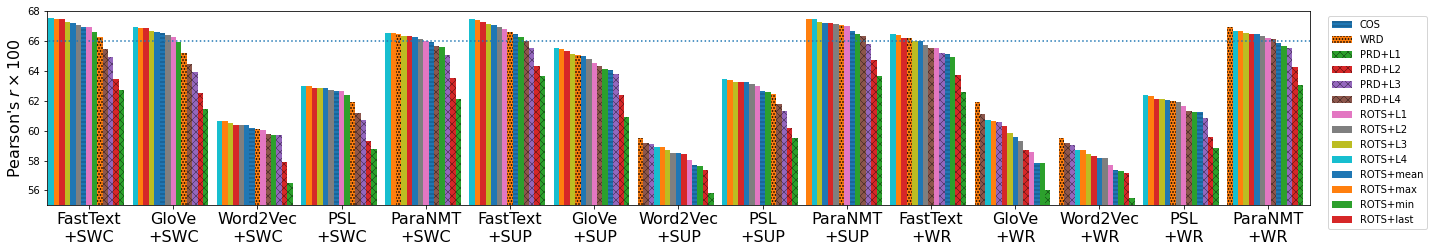

In [29]:
wv_names = {
    'fasttext': "FastText", 'glove840b': "GloVe", 'word2vec': "Word2Vec", 'psl': "PSL", 'paranmt': "ParaNMT"
}
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.3  # previous pdf hatch linewidth

def plot_bars(wvs, pres):
    labels = []
    data = defaultdict(list)
    for pre in pres:
        for wv in wvs:
            labels.append(wv_names[wv] + '\n+' + pre)
            d = get_bar_data(wv, pre)
            for k, v in d.items():
                data[k].append(v)
    # data[similarity] = [label#1 score, label#2 score, ...]
    # order[similarity] = [label#! order, label#2 order, ...]
    print(data)
    order = defaultdict(list)
    for i in range(len(labels)):
        score_list = [(k, data[k][i]) for k in data]
        sorted_score_list = sorted(score_list, key=lambda x: x[1], reverse=True)
        for i, (k, _) in enumerate(sorted_score_list):
            order[k].append(i)
    
    print(data, order)
    
    x = np.arange(len(labels))
    width = 0.9
    fig, ax = plt.subplots(figsize=(20, 3.6))
    bars = []
    
    def get_pos(_x, order): 
        return _x + width/len(data) * (order - len(data) // 2)
    
    for i, (k, v) in enumerate(data.items()):
        print(i, k, v)
        formatting = {}
        if k.split('+')[0] == 'COS':
            formatting['hatch'] = '---'
        if k.split('+')[0] == 'PRD':
            formatting['hatch'] = 'xxx'
        if k.split('+')[0] == 'WRD':
            formatting['hatch'] = 'oooo'
        
        positions = [get_pos(_x, order[k][_x]) for _x in range(len(labels))]
        bar = ax.bar(positions, v, width/len(data), label=k, **formatting)
    
    ax.set_ylabel(r"Pearson's $r \times 100$", fontsize=16)
    ax.set_ylim([55, 68])
#     ax.set_title("Ablation Study in Depth and Aggregation", fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=16)
    ax.set_xlim([-0.5, len(labels)-0.5])
    ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
    ax.plot(np.linspace(-1, 20), np.ones(50)*66, ':')
    fig.tight_layout()
    fig.savefig('/Users/zihao/Nutstore Files/我的坚果云/Research/Sentence Similarity + Prior OT/acl-ijcnlp2021-templates/ablation_depth.pdf')
plot_bars(['fasttext', 'glove840b', 'word2vec', 'psl', 'paranmt'], ['SWC', 'SUP', 'WR'])

# strength

In [30]:
file = 'log/hyperparameter_dev_SWC_fasttext.csv'

In [31]:
def plot_CP(ax, file):
    df = pd.read_csv(file)
    clist = df['correction'].unique().tolist()
    plist = df['prior'].unique().tolist()
    print(clist, plist)
    
    
    for c in clist:
        pline = []
        cdf = df[df['correction'] == c]
        for p in plist:
            cpdf = cdf[cdf['prior'] == p]
            score = cpdf['mid'].mean()
            pline.append(score*100)
        ax.plot(plist, pline, 'o-', label=r'$\alpha={:.2f}$'.format(c))
    
    ax.set_xlabel(r'Prior $\epsilon$', fontsize=18)
    ax.set_xlim([0, 16])
    ax.set_ylim([49, 70])



[0.0, 0.25, 0.5, 0.75, 1.0] [1.0, 4.0, 7.0, 10.0, 13.0, 16.0]
[0.0, 0.25, 0.5, 0.75, 1.0] [1.0, 4.0, 7.0, 10.0, 13.0, 16.0]
[0.0, 0.25, 0.5, 0.75, 1.0] [1.0, 4.0, 7.0, 10.0, 13.0, 16.0]


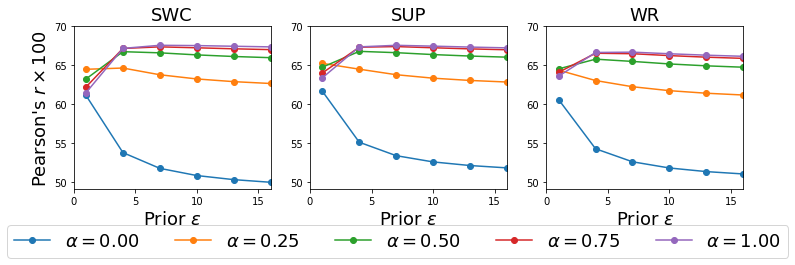

In [32]:
fformat = 'log/hyperparameter_dev_{}_{}.csv'

fig, axes = plt.subplots(ncols=3, figsize=(12, 3))

for i, wv in enumerate(['fasttext']):
    for j, pre in enumerate(['SWC', 'SUP', 'WR']):
        plot_CP(axes[j], fformat.format(pre, wv))
        axes[j].set_title(pre, fontsize=18)

axes[0].set_ylabel(r"Pearson's $r\times 100$", fontsize=18)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.), ncol=5, fontsize=18)
# fig.tight_layout()
fig.savefig("/Users/zihao/Nutstore Files/我的坚果云/Research/Sentence Similarity + Prior OT/acl-ijcnlp2021-templates/ec.png")

# Prepare the Appendix

## breakdown of core datasets with different parameters

In [33]:
for wv in VectorNames:
    for pre in ['SWC', 'SUP', 'WR']:
        show_data = defaultdict(list)
        for ds in datasets_full_list:
            for model in ['WRD', 'COS', 'ROTS']:
                filename = "log/major_compare_{}+{}/major_comparison.csv".format(model, pre)
                df = pd.read_csv(filename)
                sdf = df[df['dataset'] == ds]
                sdf = sdf[sdf['word vector'] == wv]
                for i, row in sdf.iterrows():
                    left = row['left'] * 100
                    right = row['right'] * 100
                    score = row['score'] * 100
                    BCa = "[{:.2f}, {:.2f}]".format(left, right)
                    modelraw = row['model']
                    base = modelraw.split('+')[0]
                    if base == 'ROTS':
                        if len(modelraw) == 9:
                            model = base + '+L' + modelraw[-1]
                        else:
                            model = base + '+' + modelraw[8:]
                    else:
                        model = base
                    show_data['model'].append(model)
                    show_data['score'].append("{:.2f}".format(score))
                    show_data['BCa 95% CI'].append(BCa)
                    show_data['dataset'].append(ds)
#                     show_data['dataset'] = ds
        show = pd.DataFrame(show_data)
        show = show.set_index('model')
        print(show.to_string())
        show.to_csv("out/app_1-breakdown-{}-{}.csv".format(wv, pre))

           score      BCa 95% CI       dataset
model                                         
WRD        73.01  [70.32, 75.35]     stsb:test
COS        74.22  [71.73, 76.54]     stsb:test
ROTS+L0    73.93  [71.36, 76.25]     stsb:test
ROTS+L1    74.06  [71.43, 76.41]     stsb:test
ROTS+L2    74.15  [71.55, 76.46]     stsb:test
ROTS+L3    74.14  [71.58, 76.44]     stsb:test
ROTS+L4    74.47  [71.87, 76.78]     stsb:test
ROTS+mean  74.37  [71.81, 76.73]     stsb:test
ROTS+max   74.41  [71.83, 76.67]     stsb:test
ROTS+min   74.03  [71.44, 76.36]     stsb:test
ROTS+last  74.37  [71.84, 76.66]     stsb:test
WRD        46.01  [40.33, 51.24]  twitter:test
COS        43.76  [38.16, 48.85]  twitter:test
ROTS+L0    43.62  [38.07, 48.76]  twitter:test
ROTS+L1    43.83  [38.19, 49.15]  twitter:test
ROTS+L2    43.90  [38.10, 49.26]  twitter:test
ROTS+L3    44.45  [38.75, 49.74]  twitter:test
ROTS+L4    44.82  [39.21, 50.08]  twitter:test
ROTS+mean  44.19  [38.65, 49.45]  twitter:test
ROTS+max   44

           score      BCa 95% CI       dataset
model                                         
WRD        74.58  [72.08, 76.81]     stsb:test
COS        74.78  [72.31, 77.06]     stsb:test
ROTS+L0    74.60  [72.08, 76.92]     stsb:test
ROTS+L1    74.84  [72.38, 77.09]     stsb:test
ROTS+L2    75.08  [72.64, 77.42]     stsb:test
ROTS+L3    75.25  [72.69, 77.57]     stsb:test
ROTS+L4    75.66  [73.17, 77.86]     stsb:test
ROTS+mean  75.33  [72.82, 77.56]     stsb:test
ROTS+max   75.53  [73.08, 77.77]     stsb:test
ROTS+min   74.80  [72.16, 77.14]     stsb:test
ROTS+last  75.47  [72.99, 77.64]     stsb:test
WRD        57.10  [52.42, 61.23]  twitter:test
COS        54.01  [49.35, 58.23]  twitter:test
ROTS+L0    53.74  [49.07, 57.98]  twitter:test
ROTS+L1    53.99  [49.38, 58.26]  twitter:test
ROTS+L2    54.09  [49.38, 58.41]  twitter:test
ROTS+L3    54.95  [50.26, 59.19]  twitter:test
ROTS+L4    55.56  [50.95, 59.88]  twitter:test
ROTS+mean  54.59  [49.93, 59.00]  twitter:test
ROTS+max   55

           score      BCa 95% CI       dataset
model                                         
WRD        70.64  [67.76, 73.22]     stsb:test
COS        70.41  [67.47, 73.05]     stsb:test
ROTS+L0    70.13  [67.23, 72.81]     stsb:test
ROTS+L1    70.44  [67.59, 73.09]     stsb:test
ROTS+L2    70.87  [68.02, 73.46]     stsb:test
ROTS+L3    71.03  [68.06, 73.57]     stsb:test
ROTS+L4    71.40  [68.58, 73.98]     stsb:test
ROTS+mean  70.92  [68.06, 73.46]     stsb:test
ROTS+max   71.40  [68.60, 73.96]     stsb:test
ROTS+min   70.05  [67.08, 72.66]     stsb:test
ROTS+last  71.22  [68.32, 73.74]     stsb:test
WRD        43.46  [38.05, 48.49]  twitter:test
COS        38.84  [33.44, 44.03]  twitter:test
ROTS+L0    38.46  [33.08, 43.54]  twitter:test
ROTS+L1    38.67  [33.18, 43.75]  twitter:test
ROTS+L2    39.03  [33.49, 43.93]  twitter:test
ROTS+L3    39.58  [33.98, 44.54]  twitter:test
ROTS+L4    40.03  [34.62, 45.28]  twitter:test
ROTS+mean  39.21  [33.82, 44.34]  twitter:test
ROTS+max   40

In [ ]:
for wv in VectorNames:
    for pre in ['SWC', 'SUP', 'WR']:
        show_data = defaultdict(list)
        for ds in datasets_core:
            for model in ['WRD', 'COS', 'ROTS']:
                filename = "log/major_compare_{}+{}/major_comparison.csv".format(model, pre)
                df = pd.read_csv(filename)
                sdf = df[df['dataset'] == ds]
                sdf = sdf[sdf['word vector'] == wv]
                for i, row in sdf.iterrows():
                    left = row['left'] * 100
                    right = row['right'] * 100
                    score = row['score'] * 100
                    BCa = "[{:.2f}, {:.2f}]".format(left, right)
                    modelraw = row['model']
                    base = modelraw.split('+')[0]
                    if base == 'ROTS':
                        if len(modelraw) == 9:
                            model = base + '+L' + modelraw[-1]
                        else:
                            model = base + '+' + modelraw[8:]
                    else:
                        model = base
                    show_data['model'].append(model)
                    show_data['score'].append("{:.2f}".format(score))
                    show_data['BCa 95% CI'].append(BCa)
                    show_data['dataset'].append(ds)
#                     show_data['dataset'] = ds
        show = pd.DataFrame(show_data)
        show = show.set_index('model')
        print(show.to_string())
        show.to_csv("out/app_1-breakdown-{}-{}.csv".format(wv, pre))

# Case Study

In [34]:
from model import get_dataset
stsbtest = get_dataset(dataset_name='stsb:test')

[dataset] load dataset from tmp/stsb:test.data


In [35]:
import json

In [36]:
def parse_case_diff(file='test-COS.json', key=None):
    with open(file, 'rt') as f:
        d = json.load(f)
        
    def rank_array(scores):
        id_score = [(i, t) for i, t in enumerate(scores)]
        sorted_id_score = sorted(id_score, key=lambda x: x[1])
        rank_id = [(r, i) for r, (i, _) in enumerate(sorted_id_score)]
        rank_array = np.zeros(len(rank_id))
        for r, i in rank_id:
            rank_array[i] = r
        return rank_array

    targ_rank_array = rank_array(d['target'])
    if key == None:
        pred_rank_array = rank_array(d['predict'])
    else:
        pred_rank_array = rank_array(d['predict'][key])
    return targ_rank_array, pred_rank_array
parse_case_diff()

(array([ 607.,  922., 1282., ...,  307.,  110.,  111.]),
 array([ 877., 1235., 1264., ...,  199.,  157.,  230.]))

In [45]:
candidate_index = []
files = ['test-COS.json', 'test-WRD.json']
fstr = 'test-{}.json'
data = {}
rank = {}
for model in ['WRD', 'COS']:
    fn = fstr.format(model)
    with open(fn, 'rt') as f:
        d = json.load(f)
    data['gold'] = d['target']
    data[model] = d['predict']
    targ_rank, pred_rank = parse_case_diff(fn)
    rank['gold'] = targ_rank
    rank[model] = pred_rank

In [54]:
with open('test-ROTS.json', 'rt') as f:
    d = json.load(f)

pred = d['predict']

for k in ['1', '2', '3', '4', 'mean']:
    data['ROTS' + k] = pred[k]
    _, pred_rank = parse_case_diff('test-ROTS.json', key=k)
    rank['ROTS' + k] = pred_rank

print(data.keys())
print(rank.keys())
print(rank['ROTS1'])

dict_keys(['gold', 'WRD', 'COS', 'ROTS1', 'ROTS2', 'ROTS3', 'ROTS4', 'ROTSmean'])
dict_keys(['gold', 'WRD', 'COS', 'ROTS1', 'ROTS2', 'ROTS3', 'ROTS4', 'ROTSmean'])
[ 881. 1256. 1260. ...  200.  159.  229.]


In [55]:
case = defaultdict(list)
for i, (is1, is2, _) in enumerate(stsbtest.pairs):

    s1 = stsbtest.raw_sentences[is1]
    s2 = stsbtest.raw_sentences[is2]
    case['s1'].append(s1)
    case['s2'].append(s2)
    for k in data:
        case['score_' + k].append(data[k][i])
        case['rank_' + k].append(rank[k][i])
 
show = pd.DataFrame(data=case)
show.to_csv('out/case_study.csv')

In [56]:
case_df = pd.read_csv('out/case_study.csv')

In [60]:
case_df['score_gold'] /= 5

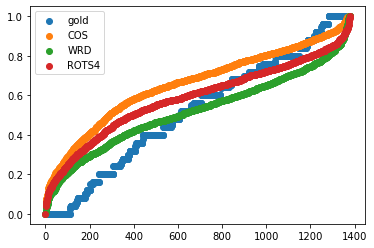

In [66]:
sims = ['gold', 'COS', 'WRD', 'ROTS4']
for s in sims:
    x = case_df['rank_'+s]
    y = case_df['score_'+s]
    y = (y - np.min(y)) / (np.max(y) - np.min(y))
    plt.scatter(x, y, label=s)
plt.legend()